# Torsional Oscillator Experiments 
## Josh Berg and Aaron Titus, High Point University

### Experiment 1.1:  Angular response to static torque: the torsion constant 

This experiment explains how to apply static torque to a rotor of the torsional oscillator through the use of weights. The torque that is applied to the oscillator causes an angular accelaration of the rotor. By examinging this angular accelerating it is possible to determine the relationship between torque and angular displacement. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #used for graphing

In [2]:
#show graphs inline (do not use for print publication quality graphs)
%matplotlib inline

In [3]:
# Read data file and define dataframe object (df for dataframe)
df_all = pd.read_table('Experiment1_a.txt')

#### Trial 1 

The images below show the experimental set up. 

![alt text](CIMG0005.JPG "Image 1")

![alt text](CIMG0003.JPG "Image 2")

The first image shows the front of the apparatus. There are two friction pulleys, one on either side of the oscillator. Hanging from these friction pulleys are "hang-down" units which are responsible for holding varying masses. The second image is a close up view of the strings and their connection to the rotor via a screw on the top portion of the rotor shaft.  

The force was calculated by taking the mass hanging from either side of the oscillator and multiplying it by the constant for gravity: 

$$F_L = m_lg$$ 

$$F_R = m_rg$$
    
To calculate the Net Torque on the oscillator the following equation was used: 

$$\tau = (m_l + m_r)gr$$ 

In [4]:
#print first five rows of data with the header
df_all.head(7)

,Left Mass (Kg),Right Mass (Kg),New Reading (rad),Angular Displacement Variable,Force Left,Force Right,Net Torque
0,0.05,0.05,2.78,0.08,0.49,0.49,0.012502
1,0.05,0.10,2.70,0.16,0.49,0.98,0.018753
2,0.05,0.15,2.56,0.30,0.49,1.47,0.025004
3,0.05,0.20,2.45,0.41,0.49,1.96,0.031255
4,0.05,0.25,2.33,0.53,0.49,2.45,0.037506
5,0.05,0.30,2.25,0.61,0.49,2.94,0.043757


The table above shows the masses for the right side of the apparatus with a constant mass of $0.05 Kg$ for the left side. Additionally, it shows the resulting angular displacement values and individual forces of the left and right side in addition to the subsequent net torque. It is important to note that the raw angular postion (unturned) is 2.86 radians. The net torque was calculated by adding the forces from both sides of the oscillator and multiplying that value by the radius of the rotor shaft. 

The radius used was:  0.012757 (m)

In [5]:
#rows, columns of data table
df_all.shape

(6, 7)

In [6]:
#Create an array for torque values
Displacement = np.array(df_all['Angular Displacement Variable'].tolist())

Static_T = np.array(df_all['Net Torque'].tolist())


In [7]:
from scipy.optimize import curve_fit

In [8]:
#function takes an array of x values and returns an array of y values
#  where y=mx+b
def func(x, m, b):
    return m*x+b #linear function

constants, stats = curve_fit(func, Displacement, Static_T)

#constants is a list
mbest=constants[0] #slope
bbest=constants[1] #intercept



ybest=func(Displacement,mbest,bbest) #y values for best fit function

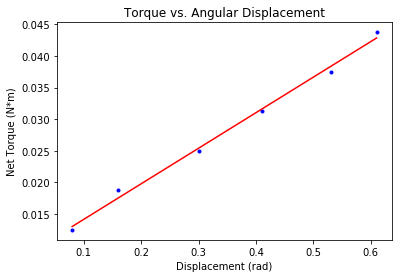

Best fit: m= 0.0562365728735  and b= 0.00854011211572


In [9]:
#plot graph
fig2 = plt.figure()
plt.title('Torque vs. Angular Displacement')
plt.xlabel('Displacement (rad)')
plt.ylabel('Net Torque (N*m)')
plt.plot(Displacement,Static_T,'b.',Displacement,ybest,'r-')
plt.show()
print("Best fit: m=",mbest," and b=",bbest)

By graphing the Net torque as a function of displacement (rad), the graphs shows the inferred torque exerted by the fiber as a function of angular displacement of the rotor: 

$$\tau = -\kappa\theta$$

therfore: 

$$\kappa = \frac{\Delta\tau}{\Delta \theta}$$

#### Trial 2 

The difference between Trials 1 and 2 is that the constant mass was kept on the right side of the oscillator rather than the left side. 

In [10]:
# Read data file and define dataframe object (df for dataframe)
df_all = pd.read_table('Experiment1_b.txt')

In [11]:
#print first five rows of data with the header
df_all.head(7)

,Left Mass (Kg),Right Mass (Kg),New Reading (rad),Angular Displacement Variable,Force Left,Force Right,Net Torque
0,0.10,0.05,2.69,0.17,0.98,0.49,0.018753
1,0.15,0.05,2.59,0.27,1.47,0.49,0.025004
2,0.20,0.05,2.48,0.38,1.96,0.49,0.031255
3,0.25,0.05,2.39,0.47,2.45,0.49,0.037506
4,0.30,0.05,2.28,0.58,2.94,0.49,0.043757


In [12]:
#rows, columns of data table
df_all.shape

(5, 7)

In [13]:
#Create an array for torque values
Displacement2 = np.array(df_all['Angular Displacement Variable'].tolist())

Static_T2 = np.array(df_all['Net Torque'].tolist())

In [14]:
#function takes an array of x values and returns an array of y values
#  where y=mx+b
def func(x, m, b):
    return m*x+b #linear function

constants, stats = curve_fit(func, Displacement2, Static_T2)

#constants is a list
mbest=constants[0] #slope
bbest=constants[1] #intercept

ybest=func(Displacement2,mbest,bbest) #y values for best fit function

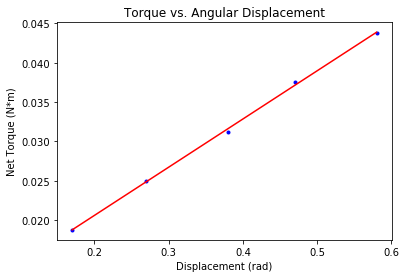

Best fit: m= 0.0612365405497  and b= 0.00835218383435


In [15]:
#plot graph
fig2 = plt.figure()
plt.title('Torque vs. Angular Displacement')
plt.xlabel('Displacement (rad)')
plt.ylabel('Net Torque (N*m)')
plt.plot(Displacement2,Static_T2,'b.',Displacement2,ybest,'r-')
plt.show()
print("Best fit: m=",mbest," and b=",bbest)

The torsion constant for trial 2 differs from the torsion constant for trial 1 by 10%. This could very well be in part to hysteresis, where there is a small-displacement regime in the angular displacement. 

In [16]:
k_1 = 0.0562365728735 #((N*m)/rad)
k_2 = 0.0612365405497 #((N*m)/rad)
k = ( k_1 + k_2)/2
print('Average kappa value:', k)

Average kappa value: 0.058736556711599996


In [19]:
avgdev=(np.abs(k-k_1)+np.abs(k-k_2))/2
avgdev

0.0024999838380999999